<a href="https://colab.research.google.com/github/Brojas1/FSP/blob/main/Copy_of_Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sales_prediction = "/content/sales_predictions.csv"

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df = pd.read_csv(sales_prediction)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
rows = len(df)
columns = len(df.columns)
print(rows)
print(columns)

8523
12


In [63]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [64]:
df = df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
df.duplicated()
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [67]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [69]:
iw = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [70]:
os = df["Outlet_Size"].fillna("Medium")

In [71]:
df["Item_Weight"] = iw
df["Outlet_Size"] = os

In [72]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
# 5) I averaged out the data because it was the best I could do.  

In [74]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [75]:
df["Item_Fat_Content"].str.lower()

#Outlet_Size
#Outlet_Size
#Outlet_Type

0       low fat
1       regular
2       low fat
3       regular
4       low fat
         ...   
8518    low fat
8519    regular
8520    low fat
8521    regular
8522    low fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [76]:
df["Item_Type"].str.lower()

0                       dairy
1                 soft drinks
2                        meat
3       fruits and vegetables
4                   household
                ...          
8518              snack foods
8519             baking goods
8520       health and hygiene
8521              snack foods
8522              soft drinks
Name: Item_Type, Length: 8523, dtype: object

In [77]:
df["Outlet_Size"].str.lower()

0       medium
1       medium
2       medium
3       medium
4         high
         ...  
8518      high
8519    medium
8520     small
8521    medium
8522     small
Name: Outlet_Size, Length: 8523, dtype: object

In [78]:
df["Outlet_Type"].str.lower()

0       supermarket type1
1       supermarket type2
2       supermarket type1
3           grocery store
4       supermarket type1
              ...        
8518    supermarket type1
8519    supermarket type1
8520    supermarket type1
8521    supermarket type2
8522    supermarket type1
Name: Outlet_Type, Length: 8523, dtype: object

In [79]:
df["Item_Weight"].min()

4.555

In [80]:
df["Item_Weight"].max()

21.35

In [81]:
df["Item_Weight"].mean()

12.857645184136409

In [82]:
df["Item_Visibility"].min()

0.0

In [83]:
df["Item_Visibility"].max()

0.328390948

In [84]:
df["Item_Visibility"].mean()

0.06613202877895127

In [85]:
df["Item_MRP"].min()

31.29

In [86]:
df["Item_MRP"].max()

266.8884

In [87]:
df["Item_MRP"].mean()

140.9927819781768

In [88]:
df["Outlet_Establishment_Year"].min()

1985

In [89]:
df["Outlet_Establishment_Year"].max()

2009

In [90]:
df["Outlet_Establishment_Year"].mean()

1997.8318667135984

In [91]:
df["Item_Outlet_Sales"].min()

33.29

In [92]:
df["Item_Outlet_Sales"].max()

13086.9648

In [93]:
df["Item_Outlet_Sales"].mean()

2181.2889135750365

In [94]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


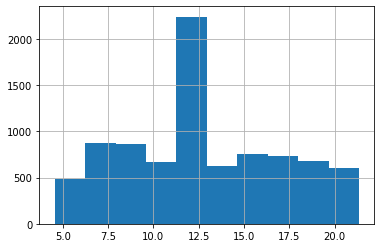

In [95]:
#df.hist();
df["Item_Weight"].hist();

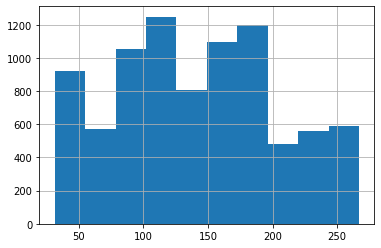

In [96]:
df["Item_MRP"].hist();

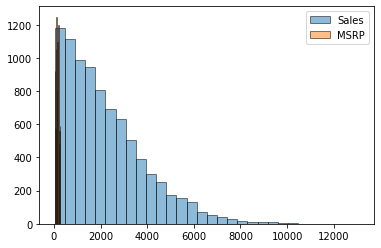

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Sales = df["Item_Outlet_Sales"]
MSRP = df["Item_MRP"]

plt.hist(Sales, 30, alpha=0.5,edgecolor='black', label='Sales')
plt.hist(MSRP, 10, alpha=0.5,edgecolor='black', label='MSRP')
plt.legend(loc='upper right')
plt.show()

In [98]:
corr = df.corr()

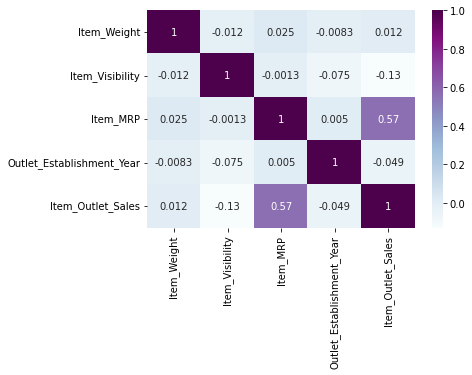

In [99]:
import seaborn as sns
sns.heatmap(corr, cmap = 'BuPu', annot = True);

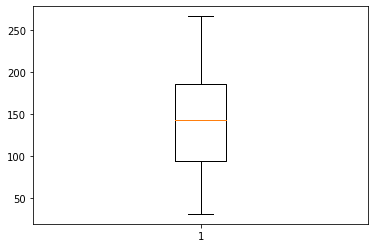

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [100]:
plt.boxplot(df["Item_MRP"])
plt.show()
df.describe()
#the boxplot shows that the majority of the data is between 93.8 and 185.6 with no outliers. 

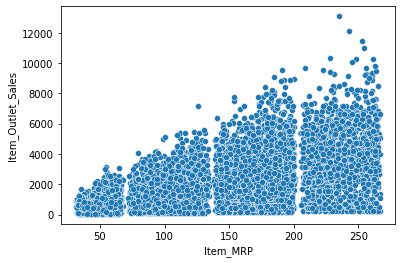

In [101]:
sns.scatterplot(data = df, x = "Item_MRP", y = "Item_Outlet_Sales");

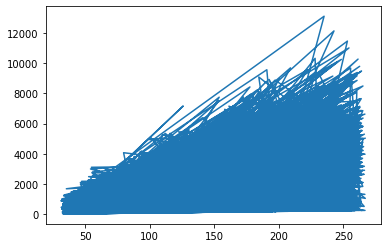

In [102]:
plt.plot(df['Item_MRP'], df['Item_Outlet_Sales']);

In [103]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
Tier1 = df["Outlet_Location_Type"] == "Tier 1"
Tier2 = df["Outlet_Location_Type"] == "Tier 2"
Tier3 = df["Outlet_Location_Type"] == "Tier 3"
sales_filter = df["Item_Outlet_Sales"]
#filtering out the tiers and sales

In [105]:
t1f = df.loc[Tier1 & sales_filter, :]
t2f = df.loc[Tier2 & sales_filter, :]
t3f = df.loc[Tier3 & sales_filter, :]
#combining the filters into new dataframes

In [106]:
plt.plot(tf['Month'], tf['Interest Paid'])
plt.plot(ff['Month'], ff['Interest Paid'])
plt.plot(ff['Month'], ff['Interest Paid'])
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.grid()
plt.legend()
plt.show()

NameError: ignored

In [ ]:
sns.boxplot(data = t1f, x = "Item_Outlet_Sales", y = "Outlet_Size")
#plt.bar(t3f["Item_Outlet_Sales"], t3f["Outlet_Size"])

In [ ]:
plt.scatter(t2f["Item_MRP"], t2f["Item_Outlet_Sales"]);
#changed to scatterplot

In [ ]:
sns.heatmap(t1f.corr(), cmap = 'BuPu', annot = True);

In [ ]:
sns.boxplot(data = t1f, x = "Outlet_Establishment_Year", y = "Item_Outlet_Sales");
#Tier 1 locations with different years of establishment and their outlet sales
#this shows a positive correlation 

In [ ]:
sns.heatmap(t3f.corr(), cmap = 'BuPu', annot = True);

In [ ]:
sns.boxplot(data = t3f, x = "Outlet_Establishment_Year", y = "Item_Outlet_Sales");
#Tier 3 locations with different years of establishment and their outlet sales
#this shows a negative correlation 

In [107]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
# Select columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Instantiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Make Pipelines for each column type
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Make column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple)
column_transformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa540780bd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa540780410>)])